In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/nckh/Images.zip -O /tmp/Images.zip
!unzip /tmp/Images.zip

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [ ]:
generator = ImageDataGenerator(rotation_range=10,shear_range=0.2,zoom_range=0.2,fill_mode='nearest')

In [ ]:
height = 480//2
width = 640//2

In [ ]:
dataset = generator.flow_from_directory(
    'Images',
    batch_size = 1,
    class_mode = 'binary',
    target_size = (height,width)
)

Found 547 images belonging to 2 classes.


In [ ]:

for i in train_g:
  
  break

[0.]


In [ ]:
classes = [i for i in train_g.class_indices.keys()]
classes

['TCImages', 'TSImages']

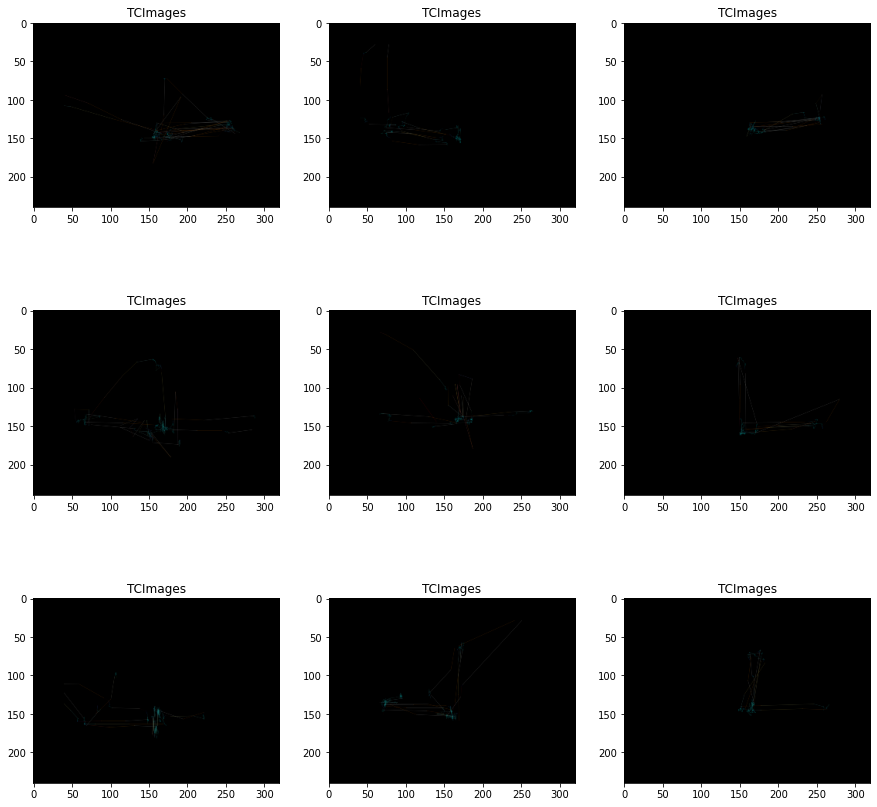

In [ ]:
fig, ax = plt.subplots(3,3)
fig.set_size_inches(15,15)
for i,row in zip(train_g,range(3)):
  for col in range(3):
    ax[row,col].imshow(i[0][col])
    ax[row,col].set_title(classes[np.argmax(i[1][col])])

In [ ]:
!pip install keras-tuner
import kerastuner as kt

In [ ]:
def model_build(hp):
  hp_units = hp.Int('units1',min_value = 32, max_value = 512,step=32)
  hp_units2 = hp.Int('units2',min_value = 32, max_value = 512,step=32)
  model = Sequential([
      layers.Conv2D(32,(5,5),padding='same',activation='relu',input_shape=(height,width,3)),
      layers.Conv2D(32,(3,3),padding='same',activation='relu'),
      layers.MaxPool2D(),

      layers.Conv2D(64,(3,3),padding='same',activation='relu'),
      layers.MaxPool2D(),

      layers.Conv2D(128,(3,3),padding='same',activation='relu'),
      layers.MaxPool2D(),

      layers.Flatten(),
     
      layers.Dense(hp_units,activation='relu'),
      layers.Dense(hp_units2,activation='relu'),
      layers.Dense(1,activation='sigmoid'),
      ])
  learning_rate = hp.Choice('learning_rate', values = [1e-2,1e-3,1e-4])
  model.compile(tf.keras.optimizers.Adam(learning_rate),loss='binary_crossentropy',metrics=[tf.keras.metrics.AUC(),'acc'])
  return model

In [ ]:
import IPython
tuner = kt.Hyperband(model_build,objective='val_acc',max_epochs=10,overwrite=True)

In [ ]:
class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args,**kwargs):
    IPython.display.clear_output(wait=True)

In [ ]:
tuner.search(train_g,validation_data=valid_g,epochs=30,callbacks = [ClearTrainingOutput()])
best_hps = tuner.get_best_hyperparameters()[0]

INFO:tensorflow:Oracle triggered exit


In [ ]:
print(best_hps.get('units1'),best_hps.get('units2'),best_hps.get('learning_rate'))

224 480 0.001


In [ ]:
model = Sequential([
      layers.Conv2D(32,(5,5),padding='same',activation='relu',input_shape=(height,width,3)),
      layers.Conv2D(32,(3,3),padding='same',activation='relu'),
      layers.MaxPool2D(),

      layers.Conv2D(64,(3,3),padding='same',activation='relu'),
      layers.MaxPool2D(),

      layers.Conv2D(128,(3,3),padding='same',activation='relu'),
      layers.MaxPool2D(),

      layers.Flatten(),
     
      layers.Dense(best_hps.get('units1'),activation='relu'),
      layers.Dense(best_hps.get('units2'),activation='relu'),
      layers.Dense(1,activation='sigmoid'),
])

In [ ]:
model.compile(tf.keras.optimizers.Adam(0.0001),loss='binary_crossentropy',metrics=[tf.keras.metrics.AUC(),'acc'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 240, 320, 32)      2432      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 240, 320, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 120, 160, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 120, 160, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 60, 80, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 60, 80, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 40, 128)      

In [ ]:
history = model.fit(train_g,epochs=30,validation_data=valid_g)

Epoch 1/30
28/28 [==============================] - 11s 377ms/step - loss: 0.6792 - auc_1: 0.6248 - acc: 0.6355 - val_loss: 0.6112 - val_auc_1: 0.8542 - val_acc: 0.7685
Epoch 2/30
28/28 [==============================] - 10s 371ms/step - loss: 0.5813 - auc_1: 0.7338 - acc: 0.7084 - val_loss: 0.4787 - val_auc_1: 0.8882 - val_acc: 0.7963
Epoch 3/30
28/28 [==============================] - 10s 374ms/step - loss: 0.5836 - auc_1: 0.7105 - acc: 0.7107 - val_loss: 0.4711 - val_auc_1: 0.9066 - val_acc: 0.8056
Epoch 4/30
28/28 [==============================] - 10s 370ms/step - loss: 0.5313 - auc_1: 0.7724 - acc: 0.7335 - val_loss: 0.4203 - val_auc_1: 0.8862 - val_acc: 0.8426
Epoch 5/30
28/28 [==============================] - 10s 369ms/step - loss: 0.5496 - auc_1: 0.7571 - acc: 0.7084 - val_loss: 0.4413 - val_auc_1: 0.8873 - val_acc: 0.7963
Epoch 6/30
28/28 [==============================] - 10s 371ms/step - loss: 0.5382 - auc_1: 0.7637 - acc: 0.7267 - val_loss: 0.4097 - val_auc_1: 0.8843 - va

In [ ]:
model.evaluate(test_g)

108/108 [==============================] - 1s 8ms/step - loss: 0.4924 - auc_1: 0.8843 - acc: 0.7593


[0.492351770401001, 0.8842576146125793, 0.7592592835426331]

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNet, InceptionV3

In [ ]:
model = InceptionV3(include_top=False,input_shape=(height,width,3))
model.trainable = False
x = layers.Flatten()(model.output)
x = layers.Dense(512,activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(128,activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1,activation='sigmoid')(x)
model = Model(model.input,x)

87916544/87910968 [==============================] - 0s 0us/step


In [ ]:
model.compile('adam',loss='binary_crossentropy',metrics=[tf.keras.metrics.AUC()])

In [ ]:
model.summary()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv2d_299 (Conv2D)             (None, 49, 49, 32)   864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_203 (BatchN (None, 49, 49, 32)   96          conv2d_299[0][0]                 
__________________________________________________________________________________________________
activation_203 (Activation)     (None, 49, 49, 32)   0           batch_normalization_203[0][0]    
_______________________________________________________________________________________

In [ ]:
history = model.fit(train_g,epochs=30,validation_data=valid_g)

Epoch 1/30
26/26 [==============================] - 5s 207ms/step - loss: 0.7031 - auc_16: 0.6302 - val_loss: 0.6984 - val_auc_16: 0.8024
Epoch 2/30
26/26 [==============================] - 4s 152ms/step - loss: 0.6403 - auc_16: 0.6882 - val_loss: 0.5059 - val_auc_16: 0.8296
Epoch 3/30
26/26 [==============================] - 4s 152ms/step - loss: 0.6050 - auc_16: 0.7303 - val_loss: 0.5292 - val_auc_16: 0.8455
Epoch 4/30
26/26 [==============================] - 4s 153ms/step - loss: 0.6054 - auc_16: 0.7035 - val_loss: 0.5209 - val_auc_16: 0.8240
Epoch 5/30
26/26 [==============================] - 4s 153ms/step - loss: 0.6156 - auc_16: 0.6960 - val_loss: 0.5807 - val_auc_16: 0.7720
Epoch 6/30
26/26 [==============================] - 4s 153ms/step - loss: 0.5862 - auc_16: 0.7239 - val_loss: 0.5729 - val_auc_16: 0.8199
Epoch 7/30
26/26 [==============================] - 4s 152ms/step - loss: 0.5547 - auc_16: 0.7694 - val_loss: 0.5790 - val_auc_16: 0.8214
Epoch 8/30
26/26 [================

In [ ]:
model.evaluate(test_g)

136/136 [==============================] - 2s 12ms/step - loss: 0.6466 - auc_16: 0.7860


[0.6465944647789001, 0.7860207557678223]

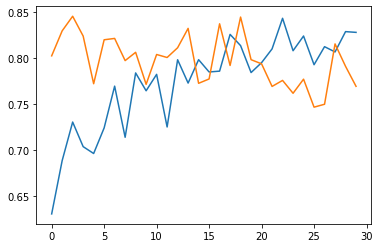

In [ ]:
acc = history.history['auc_16']
epochs = range(len(acc))
val_acc = history.history['val_auc_16']
plt.plot(epochs,acc)
plt.plot(epochs,val_acc)

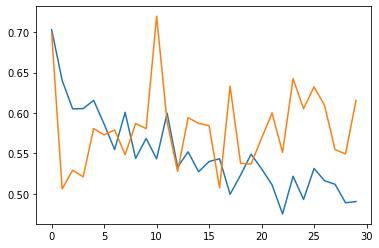

In [ ]:
acc = history.history['loss']
epochs = range(len(acc))
val_acc = history.history['val_loss']
plt.plot(epochs,acc)
plt.plot(epochs,val_acc)